# 교차 검증과 그리드 서치

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 검증 세트

* 테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 판단하기 어렵습니다. 테스트 세트를 사용하지 않고 이를 측정하는 간단한 방법은 훈련 세트를 또 나누어 검증 세트(validation set)를 생성하는 것입니다.
* 이 방법은 너무 단순하고 실제로 많이 사용하는 방식입니다. 

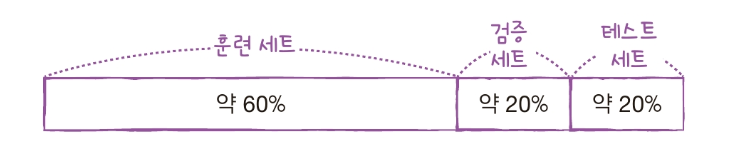


* 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가 
* 이런 식으로 테스트하고 싶은 매개변수를 바꿔가며 가장 좋은 모델을 선택합니다. 
* 그 다음 이 매개변수를 사용해 훈련 세트와 검증 세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련합니다. 그리고 마지막 테스트 세트에서 최종 점수를 평가합니다. 

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [2]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

* 훈련 데이터에서 검증 테이터를 분리합니다. 

In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

* 데이터 비율 조사

In [5]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [6]:
val_input.shape

(1040, 3)

In [7]:
test_input.shape

(1300, 3)

In [8]:
data.shape

(6497, 3)

In [9]:
(6497 -1300) * 0.2

1039.4

## 모델 생성

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차 검증
* 검증 세트를 만드느나 훈련 세트가 줄었습니다. 보통 많은 데이터를 훈련에 사용할수록 좋은 모델이 만들어집니다. 
* 그렇다고 검증 세트를 너무 조금 떼어 놓으면 검증 점수가 들쭉날쭉하고 불안정할 것입니다. 
* 이럴 때 교차 검증(cross validation)을 이용하면 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있습니다. 

* 교차 검증은 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복합니다. 
* 그 다음 이 점수를 평균하여 최종 검증 점수를 얻습니다. 

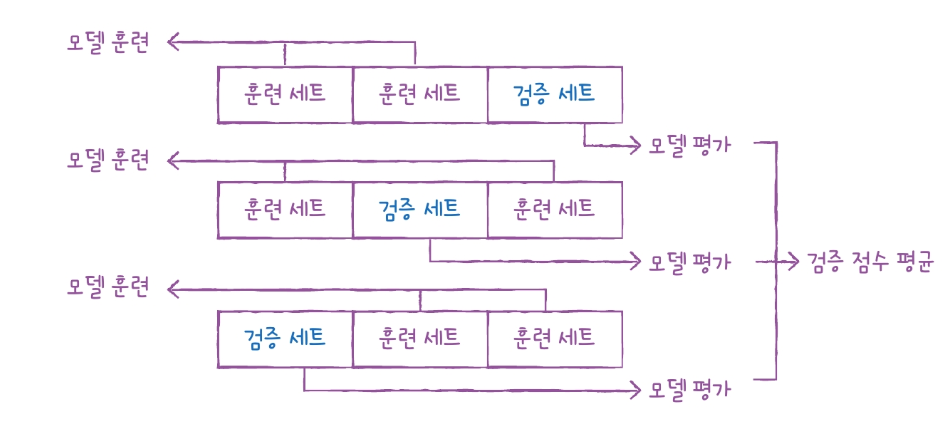

* 훈련 세트를 세 부분으로 나눠서 교차 검증을 수행하는 것을 3-폴드 교차 검증이라고 합니다. 통칭 k-fold 교차 검증이라고 하며, 훈련 세트를 몇 부분으로 나누냐에 따라 다르게 부릅니다. 

In [11]:
help(cross_validate)

NameError: name 'cross_validate' is not defined

In [12]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0059855 , 0.00799084, 0.01097083, 0.00797701, 0.00797939]), 'score_time': array([0.00099683, 0.00298047, 0.00099587, 0.0009985 , 0.00099635]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


* cv 값에 따라서 k값이 달라짐
* k의 기본값은 5

In [13]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target, cv=20)
print(scores)

{'fit_time': array([0.00698113, 0.00697899, 0.00797606, 0.00897479, 0.00697947,
       0.00701189, 0.00598407, 0.00601077, 0.01097083, 0.00695205,
       0.00598407, 0.00695395, 0.006006  , 0.00797558, 0.0059824 ,
       0.00598192, 0.00598288, 0.00598073, 0.00799108, 0.00697827]), 'score_time': array([0.00100017, 0.00099778, 0.        , 0.        , 0.        ,
       0.00096679, 0.00099707, 0.00100398, 0.00099802, 0.        ,
       0.00102496, 0.        , 0.00097775, 0.00099921, 0.        ,
       0.0009985 , 0.00100183, 0.        , 0.00101495, 0.0009973 ]), 'test_score': array([0.85      , 0.83461538, 0.85384615, 0.87692308, 0.85      ,
       0.88461538, 0.83846154, 0.86153846, 0.87692308, 0.89615385,
       0.86538462, 0.88076923, 0.86923077, 0.85384615, 0.87307692,
       0.88461538, 0.85384615, 0.86872587, 0.84942085, 0.83783784])}


In [15]:
scores['test_score']

array([0.85      , 0.83461538, 0.85384615, 0.87692308, 0.85      ,
       0.88461538, 0.83846154, 0.86153846, 0.87692308, 0.89615385,
       0.86538462, 0.88076923, 0.86923077, 0.85384615, 0.87307692,
       0.88461538, 0.85384615, 0.86872587, 0.84942085, 0.83783784])

* 처음 2개의 키는 각각 모델을 훈련하는 시간과 검증하는 시간을 의미합니다. cross_validate() 함수는 기본적으로 k-fold 교차 검증을 하기 때문에 각 키마다 5개의 숫자가 담겨있습니다. 

In [14]:
import numpy as np

print(np.mean(scores['test_score']))

0.8629915354915356


* cross_validate()는 훈련 세트를 섞어 폴드를 나누지 않습니다. 
* 교차 검증을 할 때 훈련 세트를 섞을 필요가 있을 때 StratifiedKFold를 사용합니다. 

In [16]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


* n_splits의 값을 10으로 설정하여 10-fold 교차 검증을 진행합니다. 

In [17]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 데이터를 무작위 스럽게 만들려고 
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


StratifiedKFold가 y를 공정하게 n빵 해준다?

### iris 데이터를 통한 교차검증

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
iris_data = iris.data

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris_data.shape

(150, 4)

In [24]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
scores = cross_validate(dt, iris_data, iris.target, cv=3)

In [30]:
scores['test_score'].mean()

0.96

In [31]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(dt, iris_data, iris.target, cv=splitter)
print(np.mean(scores['test_score']))

0.9533333333333335


* 1번

In [37]:
scores = cross_validate(dt, iris_data, iris.target, cv=3)
print(scores['test_score'])
print(scores['test_score'].mean())
# 강사님이 하시던데
# 여러번 해도 값이 안변함
# 순차적으로 자름?
# 의아함 확인필요

[0.98 0.94 0.96]
0.96


* 2번

In [38]:
splitter = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_validate(dt, iris_data, iris.target, cv=splitter)
print(scores['test_score'])
print(np.mean(scores['test_score']))
# 계속 바뀜

[0.93333333 0.96666667 0.9        0.93333333 0.96666667]
0.9400000000000001


In [39]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(dt, iris_data, iris.target, cv=splitter)
print(scores['test_score'])
print(np.mean(scores['test_score']))
# 이거도안변함

[1.         0.96666667 0.93333333 0.96666667 0.9       ]
0.9533333333333335


## iris 데이터를 통한 cross_validate
## KFold 클래스

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])


붓꽃 데이터 세트 크기: 150


In [41]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### y값이 3갠데 3개로 짤라서 0점 나온 경우

* kfold 같은 경우 데이터를 순차적으로 분할

In [43]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    data_train= iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[train_index]
    data_test = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    dt_clf.fit(data_train , label_train)    
    pred = dt_clf.predict(data_test)
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(label_test,pred), 4)
    print(f"accuracy : {accuracy}")
    print("--------------------------------------")

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
accuracy : 0.0
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
accuracy : 0.0
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64
accuracy : 0.0
--------------------------------------


* Stratified K폴드
    - 불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 k-fold

### 5개로 자름

In [44]:
kfold = KFold(n_splits=5)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    data_train= iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[train_index]
    data_test = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    dt_clf.fit(data_train , label_train)    
    pred = dt_clf.predict(data_test)
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(label_test,pred), 4)
    print(f"accuracy : {accuracy}")
    print("--------------------------------------")

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
0    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    30
Name: label, dtype: int64
accuracy : 1.0
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
1    40
0    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    20
1    10
Name: label, dtype: int64
accuracy : 0.9667
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
2    50
1    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    30
Name: label, dtype: int64
accuracy : 0.8667
--------------------------------------
## 교차 검증: 4
학습 레이블 데이터 분포:
 0    50
1    40
2    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    20
1    10
Name: label, dtype: int64
accuracy : 0.9333
--------------------------------------
## 교차 검증: 5
학습 레이블 데이터 분포:
 0    50
1    50
2    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    30
Name: label, dtype: int64
accuracy : 0.7333
--------------------------------------


* Stratified K폴드
    - 불균형한(imbalanced) 분포도를 가진레이블 데이터 집합을 위한 k-fold

In [45]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3)

# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    data_train= iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[train_index]
    data_test = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    dt_clf.fit(data_train , label_train)    
    pred = dt_clf.predict(data_test)
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(label_test,pred), 4)
    print(f"accuracy : {accuracy}")
    print("--------------------------------------")
# 골고루 맞춰줌

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
accuracy : 0.98
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
accuracy : 0.94
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64
accuracy : 0.98
--------------------------------------


## 하이퍼파라미터 튜닝
* 머신러닝 모델이 학습하는 파라미터를 모델 파라미터라고 부릅니다. 
* 모델이 학습할 수 없어서 사용자가 지정해야 하는 파라미터를 하이퍼파라미터라고 합니다. 
* 최적의 하이퍼파라미터의 값을 어떻게 찾아봅시다. 
* 먼저 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련합니다. 
* 그 다음 검증 세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경합니다. 
* 이 매개변수를 변경하면서 모델을 훈련하고 교차 검증을 수행합니다. 
* 요즘은 사람의 개입없이 자동으로 하이퍼파라미터를 찾아주는 AutoML도 많이 사용합니다. 

* 사이킷런에서 제공하는 그리드 서치(Grid Search)를 사용하여 값을 찾을 수 있습니다. 
* 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행합니다. 그렇기 때문에 corss_validate() 함수를 따로 호출할 필요는 없습니다. 
* min_impurity_decrease를 사용하여 불순도 감소량을 지정합니다. 

In [46]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

* 결정 트리에서 사용할 min_impurity_decrease 매개변수의 값 후보를 입력하고 넘깁니다. 
* fit() 메서드는 그리드 서치 객체에서 min_impurity_decrease 값을 변경하며 총 5번 실행하비다. 
* GridSearchCV의 cv 매개변수 기본값은 5이기 때문에 총 25개의 모델을 훈련합니다. 
* n_jobs 매개변수에서 병렬 실행에 사용할 CPU 코어 수를 지정하면 속도를 빠르게 할 수 있습니다. 기본값은 1이며, -1로 지정하면 시스템에 있는 모든 코어를 사용합니다. 

In [47]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [48]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [49]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

* 가장 좋은 모델을 출력해보겠습니다. 

In [53]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [54]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9615162593804117
0.8653846153846154


In [55]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [56]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [57]:
import numpy as np

In [60]:
np.argmin(gs.cv_results_['mean_test_score'])

1

In [61]:
np.argmax(gs.cv_results_['mean_test_score'])

0

In [59]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


gs.cv_results에서 가장 점수가 낮은 index를 찾아준다. <br>
gs.best_params_와 동일한 결과가 나온다.

In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10),
          'min_samples_leaf': range(1, 25),
          }
# 이렇게 후보들을 만들어놓으면 전체를 다 돌려주는 그리드서치
# 시간이 엄청나게 걸림
# 그래서 이럴때 랜덤서치를 사용함

돌리는데 시간 엄청걸림..

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

### 랜덤 서치
* 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있습니다. 
* 또 너무 많은 매개변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴 수 있습니다. 이럴 때 랜덤 서치(Random Search)를 사용하면 좋습니다. 
* 랜덤 서치는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달합니다. 
------
* uniform과 randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑습니다. 이를 균등 분포에서 샘플링한다고 합니다. 
* randint는 정숫값을 뽑고, uniform은 실수값을 뽑습니다. 

In [63]:
from scipy.stats import uniform, randint

In [64]:
rgen = randint(0, 10)
rgen.rvs(10)
# 숫자 아무거나 뽑아주는듯?? 범위 x~y

array([3, 7, 6, 7, 3, 4, 0, 6, 1, 3])

In [65]:
np.unique(rgen.rvs(1000), return_counts=True)
# 중복 안되게?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 91, 102, 104, 111, 109,  89,  95, 105, 100,  94], dtype=int64))

In [68]:
ugen = uniform(0, 1)
ugen.rvs(10)
# 실수 아무거나 뽑는것같음 범위는 x~y

array([0.83831445, 0.22809021, 0.4407954 , 0.07245169, 0.54934449,
       0.71155106, 0.7587505 , 0.57190132, 0.40652705, 0.19048523])

In [70]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

* 위의 파라미터의 min_imputiry_decrease는 0.0001에서 0.001 사이의 실수값을 샘플링합니다. 
* max_depth는 20에서 50 사이의 정수 
* min_sample_split : 2에서 25사이의 정수 
* min_samples_leaf는 1에서 25사이의 정수를 샘플링 
---------
* RandomizedSearchCV 클래스를 사용하여 진행합니다. n_iter는 샘플링의 횟수를 의미합니다. 
* params에 정의된 매개변수 범위에서 총 100번을 샘플링하여 교차 검증을 수행하고 최적의 매개변수 조합을 찾습니다. 
* 앞서 그리드 서치보다 휠씬 교차 검증 수를 줄이면서 넓은 영역을 효과적으로 탐색할 수 있는 장점

In [71]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027917713AF0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002791762FA60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027917642280>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002791771F0A0>},
                   random_state=42)

In [72]:
{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_leaf': 4, 'min_samples_split': 2}

{'max_depth': 14,
 'min_impurity_decrease': 0.0004,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [73]:
0.8695413489301844

0.8695413489301844

In [74]:
print(gs.best_params_)
# 이 파라미터 값을 찾기 위해 하는거

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [75]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [76]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8928227823744468
0.86


## 확인문제

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

훈련세트를 여러 개의 폴드로 나누고 폴드 1개는평가 용도로, 나머지 폴드는 훈련 용도로 
사용합니다. 그다음모든 폴드를 평가 용도로 사용하게끔 폴드 개수만큼 이 과정을 반복합니
다. 이런 평가 방법을 무엇이라고 부르나요?
1. 교차 검증
2. 반복 검증
3. 교차 평가
4. 반복 평가

교차 검증을 수행하지 않는 함수나 클래스는 무엇인가요?
1. cross_validate()
2. GridSearchCV
3. RandomizedSearchCV
4. train_test_split

마지막 RandomizedSearchCV 예제에서 DecisionTreeClassifier 클래스에 <br>
splitter='random' 매개변수를 추가하고 다시 훈련해보세요. splitter 매개변수의 <br> 
기본값은'best'로 각 노드에서 최선의 분할을 찾습니다. 'random'이면 무작위로 <br> 
분할한 다음 가장 좋은 것을 고릅니다. 왜 이런 옵션이 필요한지는 다음 절에서 <br> 
알 수 있습니다. <br>
테스트세트에서 성능이 올라갔나요? 내려갔나요?

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

In [ ]:
dt = gs.best_estimator_
dt

In [ ]:
dt.score(test_input, test_target)

점수가 내려갔다
랜덤이기 때문에 최적의 값을 찾지못했다
그럼 왜있냐? 오후에...